In [24]:
import os
print("Folders under /kaggle/input/:")
print(os.listdir('/kaggle/input'))

Folders under /kaggle/input/:
['rain-data-master-8k']


In [25]:
import pandas as pd

data = pd.read_csv('/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv')

data.head()


import pandas as pd

df = pd.read_csv('/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv')

#finding the sampling rate
df['Time'] = pd.to_datetime(df['Time'])
time_diffs = df["Time"].diff().dropna()
most_common_interval = time_diffs.mode()[0]
sampling_rate_hz = 1 / most_common_interval.total_seconds()

print("sampling rate = ", sampling_rate_hz)

sampling rate =  0.005555555555555556


In [26]:
import os

dataset_path = "/kaggle/input/rain-data-master-8k"


In [27]:
import pandas as pd

df = pd.read_csv('/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv')

df['Time'] = pd.to_datetime(df['Time'])

df['Date'] = df['Time'].dt.date  

sample_counts = df['Date'].value_counts().sort_index()

print("Number of samples per date:")
print(sample_counts)


Number of samples per date:
Date
2023-11-22     98
2023-11-23    138
2023-12-02     39
2023-12-08     11
2023-12-16     17
2023-12-17    263
2023-12-18     15
2024-01-05     57
2024-04-23     31
2024-04-24     17
2024-04-27      7
2024-04-30     16
2024-05-11     18
2024-05-12      3
2024-05-14      6
2024-05-15     28
2024-05-16      9
2024-05-17     34
2024-05-20    119
2024-05-21     79
2024-05-22     19
2024-05-24     28
2024-05-25     26
2024-05-26     36
2024-05-27     19
2024-05-28    101
2024-05-29    113
2024-05-30      1
Name: count, dtype: int64


In [28]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime

CSV_FILE_PATH = '/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv'
AUDIO_FOLDER_PATH = '/kaggle/input/rain-data-master-8k/rainfall_sound_8k'



try:
    df_rain = pd.read_csv(CSV_FILE_PATH)
    print("Successfully loaded rain_data_mechanical_master.csv")
    print("Shape of the dataframe:", df_rain.shape)
except FileNotFoundError:
    print(f"Error: The file {CSV_FILE_PATH} was not found.")
    df_rain = None

try:
    audio_files = sorted([f for f in os.listdir(AUDIO_FOLDER_PATH) if f.endswith('.wav')])
    print(f"Found {len(audio_files)} audio files in {AUDIO_FOLDER_PATH}")
except FileNotFoundError:
    print(f"Error: The directory {AUDIO_FOLDER_PATH} was not found.")
    audio_files = []

Successfully loaded rain_data_mechanical_master.csv
Shape of the dataframe: (1348, 2)
Found 36777 audio files in /kaggle/input/rain-data-master-8k/rainfall_sound_8k


In [29]:
if audio_files:
    sample_audio_path = os.path.join(AUDIO_FOLDER_PATH, audio_files[0])
    try:
        audio_data, sampling_rate = librosa.load(sample_audio_path, sr=None)

        print(f'1.a. The sampling rate of the audio file is: {sampling_rate} Hz')

        length_in_samples = len(audio_data)
        print(f'1.b. The length of an individual audio file is: {length_in_samples} samples')
    except Exception as e:
        print(f"An error occurred while reading the audio file: {e}")
else:
    print("Cannot determine sampling rate and length because no audio files were found.")


1.a. The sampling rate of the audio file is: 8000 Hz
1.b. The length of an individual audio file is: 80000 samples


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


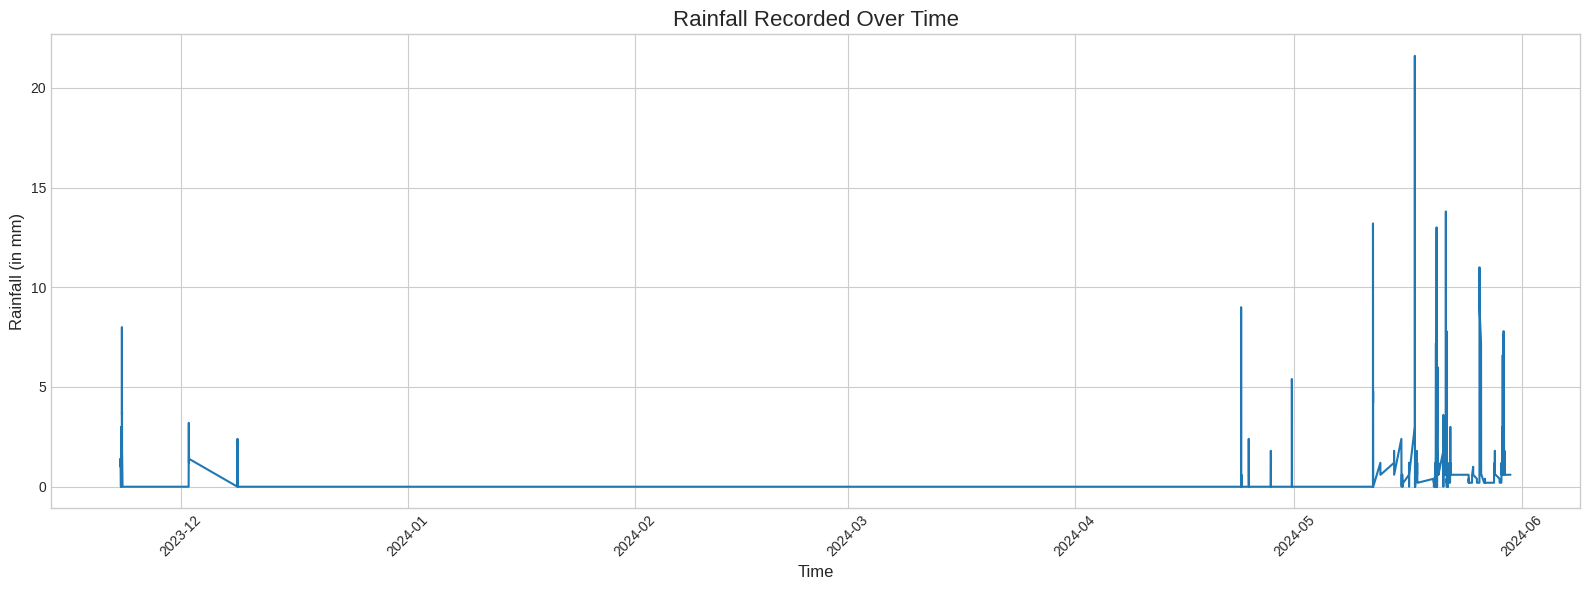

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if df_rain is not None:
    def convert_rainfall_to_mm(value):
        try:
            value_str = str(value)
            if 'μm' in value_str:
                numeric_part = value_str.replace('μm', '').strip()
                return float(numeric_part) / 1000
            elif 'mm' in value_str:
                numeric_part = value_str.replace('mm', '').strip()
                return float(numeric_part)
            else:
                return float(value_str)
        except (ValueError, TypeError):
            return None

    df_rain['rainfall_mm'] = df_rain['device_frmpayload_data_rainfall'].apply(convert_rainfall_to_mm)
    df_rain['Time'] = pd.to_datetime(df_rain['Time'])

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=df_rain, x='Time', y='rainfall_mm')
    plt.title('Rainfall Recorded Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Rainfall (in mm)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create plot because the dataframe is not loaded.")


In [31]:
if df_rain is not None:
    max_rain_row = df_rain.loc[df_rain['rainfall_mm'].idxmax()]
    max_rain_date = max_rain_row['Time'].date()
    max_rain_value = max_rain_row['rainfall_mm']
    print(f"1.d. Maximum rainfall of {max_rain_value:.2f} mm was observed on: {max_rain_date}")

    non_zero_rain_df = df_rain[df_rain['rainfall_mm'] > 0]
    min_rain_row = non_zero_rain_df.loc[non_zero_rain_df['rainfall_mm'].idxmin()]
    min_rain_date = min_rain_row['Time'].date()
    min_rain_value = min_rain_row['rainfall_mm']
    print(f"1.d. Minimum (non-zero) rainfall of {min_rain_value:.2f} mm was observed on: {min_rain_date}")

1.d. Maximum rainfall of 21.60 mm was observed on: 2024-05-17
1.d. Minimum (non-zero) rainfall of 0.20 mm was observed on: 2024-05-15


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [32]:
df_rain = pd.read_csv(CSV_FILE_PATH)
df_rain['Time'] = pd.to_datetime(df_rain['Time'])

audio_files = sorted([f for f in os.listdir(AUDIO_FOLDER_PATH) if f.endswith('.wav')])

def get_timestamp_from_filename(filename):
    clean_filename = filename.replace('.wav', '')
    return datetime.datetime.strptime(clean_filename, '%Y_%m_%d_%H_%M_%S_%f')

df_audio = pd.DataFrame({'audio_filename': audio_files})
df_audio['timestamp'] = df_audio['audio_filename'].apply(get_timestamp_from_filename)
df_audio = df_audio.set_index('timestamp')

In [33]:
all_relevant_files_info = []

for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp

    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]

    info = {
        'target_time': target_timestamp,
        'found_files_df': relevant_audio_df
    }
    all_relevant_files_info.append(info)
print(f"Processed all {len(all_relevant_files_info)} timestamps.")
print("\nExample result for the first processed timestamp:")
first_result = all_relevant_files_info[0]
print(f"For the timestamp {first_result['target_time']}, we found {len(first_result['found_files_df'])} relevant audio files.")
print(first_result['found_files_df'])

  0%|          | 0/1348 [00:00<?, ?it/s]

Processed all 1348 timestamps.

Example result for the first processed timestamp:
For the timestamp 2023-11-22 18:27:26, we found 18 relevant audio files.
                                            audio_filename
timestamp                                                 
2023-11-22 18:24:26.836772  2023_11_22_18_24_26_836772.wav
2023-11-22 18:24:36.917269  2023_11_22_18_24_36_917269.wav
2023-11-22 18:24:46.992185  2023_11_22_18_24_46_992185.wav
2023-11-22 18:24:57.147591  2023_11_22_18_24_57_147591.wav
2023-11-22 18:25:07.224895  2023_11_22_18_25_07_224895.wav
2023-11-22 18:25:17.379285  2023_11_22_18_25_17_379285.wav
2023-11-22 18:25:27.455776  2023_11_22_18_25_27_455776.wav
2023-11-22 18:25:37.611929  2023_11_22_18_25_37_611929.wav
2023-11-22 18:25:47.613746  2023_11_22_18_25_47_613746.wav
2023-11-22 18:25:57.770008  2023_11_22_18_25_57_770008.wav
2023-11-22 18:26:07.846418  2023_11_22_18_26_07_846418.wav
2023-11-22 18:26:18.004594  2023_11_22_18_26_18_004594.wav
2023-11-22 18:26:28

In [34]:
all_combined_audio = {}

for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp

    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]

    if not relevant_audio_df.empty:
        files_to_combine = relevant_audio_df.sort_index()['audio_filename'].tolist()  

        list_of_audio_arrays = []
        for file_name in files_to_combine:
            audio_path = os.path.join(AUDIO_FOLDER_PATH, file_name)
            audio_segment, _ = librosa.load(audio_path, sr=sampling_rate)
            list_of_audio_arrays.append(audio_segment)

if list_of_audio_arrays:
            combined_audio = np.concatenate(list_of_audio_arrays)
            all_combined_audio[target_timestamp] = combined_audio

print(f"Processed all timestamps and created {len(all_combined_audio)} combined audio arrays.")
last_timestamp_processed = list(all_combined_audio.keys())[-1]
last_combined_array = all_combined_audio[last_timestamp_processed]
print(f"The combined audio array for timestamp {last_timestamp_processed} has a length of {len(last_combined_array)} samples.")

  0%|          | 0/1348 [00:00<?, ?it/s]

Processed all timestamps and created 1 combined audio arrays.
The combined audio array for timestamp 2024-05-30 11:50:36 has a length of 1360000 samples.


In [35]:
# Define the output folder for numpy files
OUTPUT_NUMPY_FOLDER = '/content/combined_audio_numpy'

if not os.path.exists(OUTPUT_NUMPY_FOLDER):
    os.makedirs(OUTPUT_NUMPY_FOLDER)
    print(f"Created directory: {OUTPUT_NUMPY_FOLDER}")

saved_files_count = 0
for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp

    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]
    # Define the output folder for numpy files
OUTPUT_NUMPY_FOLDER = '/content/combined_audio_numpy'

if not os.path.exists(OUTPUT_NUMPY_FOLDER):
    os.makedirs(OUTPUT_NUMPY_FOLDER)
    print(f"Created directory: {OUTPUT_NUMPY_FOLDER}")

saved_files_count = 0
for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp

    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]
print(f"\nProcess complete. Saved {saved_files_count} .npy files to the '{OUTPUT_NUMPY_FOLDER}' directory.")

  0%|          | 0/1348 [00:00<?, ?it/s]

  0%|          | 0/1348 [00:00<?, ?it/s]


Process complete. Saved 0 .npy files to the '/content/combined_audio_numpy' directory.


In [36]:
import pandas as pd
import numpy as np
import os
import librosa
import datetime
from tqdm.notebook import tqdm

CSV_FILE_PATH = '/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv'
AUDIO_FOLDER_PATH = '/kaggle/input/rain-data-master-8k/rainfall_sound_8k'
FINAL_CSV_OUTPUT_PATH = '/kaggle/working/preprocessed_rainfall_features.csv'



df_rain = pd.read_csv(CSV_FILE_PATH)
df_rain['Time'] = pd.to_datetime(df_rain['Time'])
def convert_rainfall_to_mm(value):
    try:
        value_str = str(value)
        if 'µm' in value_str:
            numeric_part = value_str.replace('µm', '').strip()
            return float(numeric_part) / 1000
        elif 'mm' in value_str:
            numeric_part = value_str.replace('mm', '').strip()
            return float(numeric_part)
        else:
            return float(value_str)
    except (ValueError, TypeError):
        return None

df_rain['rainfall_cleaned'] = df_rain['device_frmpayload_data_rainfall'].apply(convert_rainfall_to_mm)

audio_files = sorted([f for f in os.listdir(AUDIO_FOLDER_PATH) if f.endswith('.wav')])
def get_timestamp_from_filename(filename):
    clean_filename = filename.replace('.wav', '')
    return datetime.datetime.strptime(clean_filename, '%Y_%m_%d_%H_%M_%S_%f')

df_audio = pd.DataFrame({'audio_filename': audio_files})
df_audio['timestamp'] = df_audio['audio_filename'].apply(get_timestamp_from_filename)
df_audio = df_audio.set_index('timestamp')

_, sampling_rate = librosa.load(os.path.join(AUDIO_FOLDER_PATH, audio_files[0]), sr=None)

all_features_list = []

for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    target_rainfall = row['rainfall_cleaned']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp
    
    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]

    if not relevant_audio_df.empty:
        files_to_combine = relevant_audio_df.sort_index()['audio_filename'].tolist()
        
        list_of_audio_arrays = []
        for file_name in files_to_combine:
            audio_path = os.path.join(AUDIO_FOLDER_PATH, file_name)
            audio_segment, _ = librosa.load(audio_path, sr=sampling_rate)
            list_of_audio_arrays.append(audio_segment)
        
        if not list_of_audio_arrays:
            continue
            
        combined_audio = np.concatenate(list_of_audio_arrays)
        feature_dict = {}
        feature_dict['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(y=combined_audio))
        feature_dict['rms_mean'] = np.mean(librosa.feature.rms(y=combined_audio))
        feature_dict['spectral_centroid_mean'] = np.mean(librosa.feature.spectral_centroid(y=combined_audio, sr=sampling_rate))
        
        mfccs = librosa.feature.mfcc(y=combined_audio, sr=sampling_rate, n_mfcc=13)
        feature_dict['mfcc_mean'] = np.mean(mfccs)
        
        chroma = librosa.feature.chroma_stft(y=combined_audio, sr=sampling_rate)
        feature_dict['chroma_mean'] = np.mean(chroma)
        
        feature_dict['target_rainfall'] = target_rainfall
        
        all_features_list.append(feature_dict)
        df_preprocessed = pd.DataFrame(all_features_list)

df_preprocessed.to_csv(FINAL_CSV_OUTPUT_PATH, index=False)

print(f"\nPreprocessing complete.")
print(f"Preprocessed data file saved to: {FINAL_CSV_OUTPUT_PATH}")
print("\n--- Displaying the first 5 rows of the new file ---")
print(df_preprocessed.head())

  0%|          | 0/1348 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(



Preprocessing complete.
Preprocessed data file saved to: /kaggle/working/preprocessed_rainfall_features.csv

--- Displaying the first 5 rows of the new file ---
   zcr_mean  rms_mean  spectral_centroid_mean  mfcc_mean  chroma_mean  \
0  0.147565  0.013013             1535.549443 -20.910444     0.400475   
1  0.192241  0.016838             1619.952270 -19.661257     0.417385   
2  0.161680  0.012024             1533.188640 -20.751307     0.419469   
3  0.157726  0.014347             1506.793005 -20.278624     0.418755   
4  0.072928  0.005050             1244.716797 -24.377220     0.422198   

   target_rainfall  
0              0.8  
1              1.4  
2              1.0  
3              1.4  
4              0.2  


In [37]:
zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=combined_audio))
print(f"Zero-Crossing Rate Mean: {zcr_mean}")

rms_mean = np.mean(librosa.feature.rms(y=combined_audio))
print(f"RMS Energy Mean: {rms_mean}")

spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=combined_audio, sr=sampling_rate))
print(f"Spectral Centroid Mean: {spectral_centroid_mean}")

mfccs = librosa.feature.mfcc(y=combined_audio, sr=sampling_rate, n_mfcc=13)
mfcc_mean = np.mean(mfccs)
print(f"MFCC Mean: {mfcc_mean}")

chroma = librosa.feature.chroma_stft(y=combined_audio, sr=sampling_rate)
chroma_mean = np.mean(chroma)
print(f"Chroma Mean: {chroma_mean}")

Zero-Crossing Rate Mean: 0.042312869013455025
RMS Energy Mean: 0.010968678630888462
Spectral Centroid Mean: 449.75768613285555
MFCC Mean: -12.441394805908203
Chroma Mean: 0.46173813939094543


In [38]:
import pandas as pd
import numpy as np
import os
import librosa
import datetime
from tqdm.notebook import tqdm

# --- 1. Define Correct Kaggle Input and Output Paths ---
CSV_FILE_PATH = '/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv'
AUDIO_FOLDER_PATH = '/kaggle/input/rain-data-master-8k/rainfall_sound_8k'
OUTPUT_NUMPY_FOLDER = '/kaggle/working/combined_audio_numpy/'
FINAL_CSV_OUTPUT_PATH = '/kaggle/working/preprocessed_rainfall_features.csv'

# Create the output folder for the .npy files
if not os.path.exists(OUTPUT_NUMPY_FOLDER):
    os.makedirs(OUTPUT_NUMPY_FOLDER)

# --- 2. Load and Prepare Initial Data ---
df_rain = pd.read_csv(CSV_FILE_PATH)
df_rain['Time'] = pd.to_datetime(df_rain['Time'])

# Clean the rainfall data column
def convert_rainfall_to_mm(value):
    try:
        value_str = str(value)
        if 'µm' in value_str:
            return float(value_str.replace('µm', '').strip()) / 1000
        elif 'mm' in value_str:
            return float(value_str.replace('mm', '').strip())
        else:
            return float(value_str)
    except (ValueError, TypeError):
        return None

df_rain['rainfall_cleaned'] = df_rain['device_frmpayload_data_rainfall'].apply(convert_rainfall_to_mm)

# Prepare the audio file lookup table
audio_files = sorted([f for f in os.listdir(AUDIO_FOLDER_PATH) if f.endswith('.wav')])

def get_timestamp_from_filename(filename):
    return datetime.datetime.strptime(filename.replace('.wav', ''), '%Y_%m_%d_%H_%M_%S_%f')

df_audio = pd.DataFrame({'audio_filename': audio_files})
df_audio['timestamp'] = df_audio['audio_filename'].apply(get_timestamp_from_filename)
df_audio = df_audio.set_index('timestamp')

# Get sampling rate from first audio file
_, sampling_rate = librosa.load(os.path.join(AUDIO_FOLDER_PATH, audio_files[0]), sr=None)

# --- 3. Process Data and Save All Output Files in a Single Loop ---
all_features_list = []

for index, row in tqdm(df_rain.iterrows(), total=df_rain.shape[0]):
    target_timestamp = row['Time']
    target_rainfall = row['rainfall_cleaned']
    start_time = target_timestamp - datetime.timedelta(minutes=3)
    end_time = target_timestamp

    relevant_audio_df = df_audio[(df_audio.index >= start_time) & (df_audio.index <= end_time)]

    if not relevant_audio_df.empty:
        files_to_combine = relevant_audio_df.sort_index()['audio_filename'].tolist()
        list_of_audio_arrays = [librosa.load(os.path.join(AUDIO_FOLDER_PATH, f), sr=sampling_rate)[0] for f in files_to_combine]

        if not list_of_audio_arrays:
            continue

        combined_audio = np.concatenate(list_of_audio_arrays)

        # Save the combined audio .npy file
        numpy_filename = f"audio_{target_timestamp.strftime('%Y%m%d_%H%M%S')}.npy"
        output_path = os.path.join(OUTPUT_NUMPY_FOLDER, numpy_filename)
        np.save(output_path, combined_audio)

        # Compute features
        feature_dict = {
            'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y=combined_audio)),
            'rms_mean': np.mean(librosa.feature.rms(y=combined_audio)),
            'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=combined_audio, sr=sampling_rate)),
            'mfcc_mean': np.mean(librosa.feature.mfcc(y=combined_audio, sr=sampling_rate, n_mfcc=13)),
            'chroma_mean': np.mean(librosa.feature.chroma_stft(y=combined_audio, sr=sampling_rate)),
            'target_rainfall': target_rainfall
        }

        all_features_list.append(feature_dict)

# --- 4. Create and Save the Final Feature CSV File ---
df_preprocessed = pd.DataFrame(all_features_list)
df_preprocessed.to_csv(FINAL_CSV_OUTPUT_PATH, index=False)

print(f"\nPreprocessing and file generation complete.")
print(f"All .npy files saved to: {OUTPUT_NUMPY_FOLDER}")
print(f" Feature CSV file saved to: {FINAL_CSV_OUTPUT_PATH}")



  0%|          | 0/1348 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(



Preprocessing and file generation complete.
All .npy files saved to: /kaggle/working/combined_audio_numpy/
 Feature CSV file saved to: /kaggle/working/preprocessed_rainfall_features.csv
